In [337]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import NearestNeighbors,  LocalOutlierFactor, KernelDensity

In [338]:
from sklearn.preprocessing import MinMaxScaler
n_samples = 1000
n_outliers=20

X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)




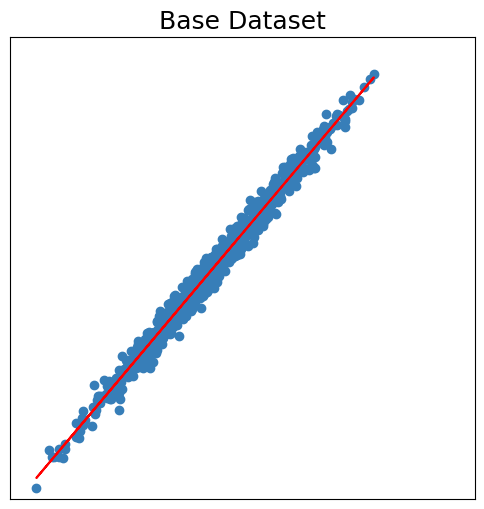

In [339]:
lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)
plt.figure(figsize=(6, 6))

# Plot the data
plt.scatter(X, y, color='#377eb8', label='Dataset (No Outliers)')

plt.plot(X.reshape(-1,1), lr.predict(X.reshape(-1,1)), color='red', label='Regression Model (No Outliers)')



plt.xlim(-3.5, 4.5)
plt.ylim(-275, 275)
plt.xticks(())
plt.yticks(())
plt.title("Base Dataset", size=18)
p1 = plt.gcf()

plt.show()


In [340]:

# Add impulse noise to X
np.random.seed(0)
X_noisy = np.copy(X)

outlier_indices = np.random.choice(len(X), size=n_outliers, replace=False)
X_noisy[outlier_indices] = np.random.uniform(low=0, high = 2, size=(n_outliers, X_noisy.shape[1])) +2



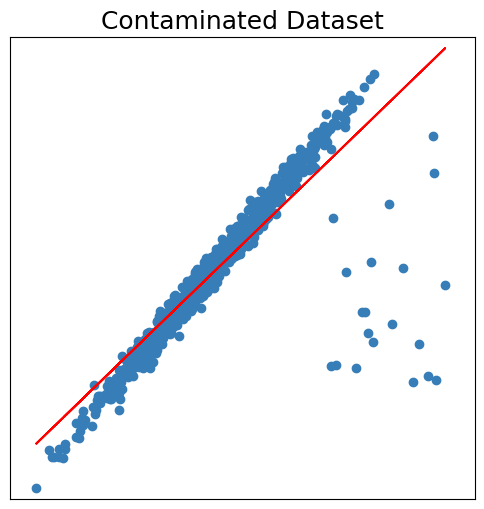

In [341]:
lr = LinearRegression()
lr.fit(X_noisy.reshape(-1,1), y)

# Plot the data
plt.figure(figsize=(6, 6))

plt.scatter(X_noisy, y, color='#377eb8', label='Dataset (No Outliers)')

plt.plot(X_noisy.reshape(-1,1), lr.predict(X_noisy.reshape(-1,1)), color='red', label='Regression Model (No Outliers)')


plt.xlim(-3.5, 4.5)
plt.ylim(-275, 275)
plt.xticks(())
plt.yticks(())
plt.title("Contaminated Dataset", size=18)
p2 = plt.gcf()

plt.show()

In [342]:
data = np.column_stack((X_noisy, y))
data

array([[  -2.55298982, -215.54929543],
       [   1.76405235,  151.74196541],
       [  -1.79132755, -134.99952086],
       ...,
       [   0.57659082,   42.71671175],
       [  -0.43515355,  -35.40218574],
       [   0.42262862,   34.78008052]])

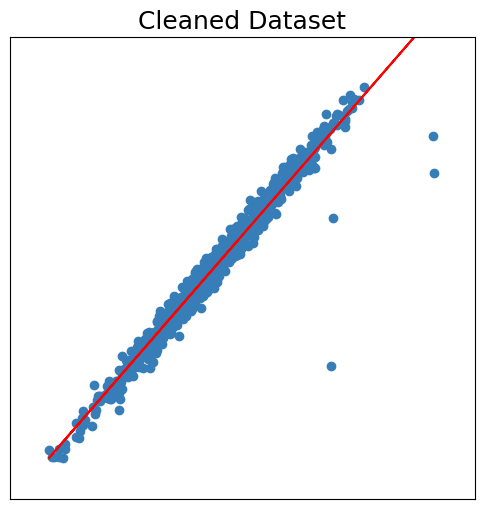

In [343]:

# Use k-NN to remove outliers
lof = LocalOutlierFactor(n_neighbors=5)
outlier_mask = lof.fit_predict(data) == 1



# Separate X and y without outliers
X_no_outliers = data[outlier_mask, 0]
y_no_outliers = data[outlier_mask, 1]


# Perform regression
lr_no_outliers = LinearRegression()
lr_no_outliers.fit(X_no_outliers.reshape(-1,1), y_no_outliers)

# Plot the data
plt.figure(figsize=(6, 6))

plt.scatter(X_no_outliers, y_no_outliers, color='#377eb8', label='Dataset (No Outliers)')
# plt.scatter(X_noisy[outlier_indices, 0], X_noisy[outlier_indices, 1], marker='*', s=100, color=colors[y_pred[outlier_indices]])

plt.plot(X_no_outliers.reshape(-1,1), lr_no_outliers.predict(X_no_outliers.reshape(-1,1)), color='red', label='Regression Model (No Outliers)')

plt.xlim(-3.5, 4.5)
plt.ylim(-275, 275)
plt.xticks(())
plt.yticks(())
plt.title("Cleaned Dataset", size=18)
p3 = plt.gcf()

plt.show()


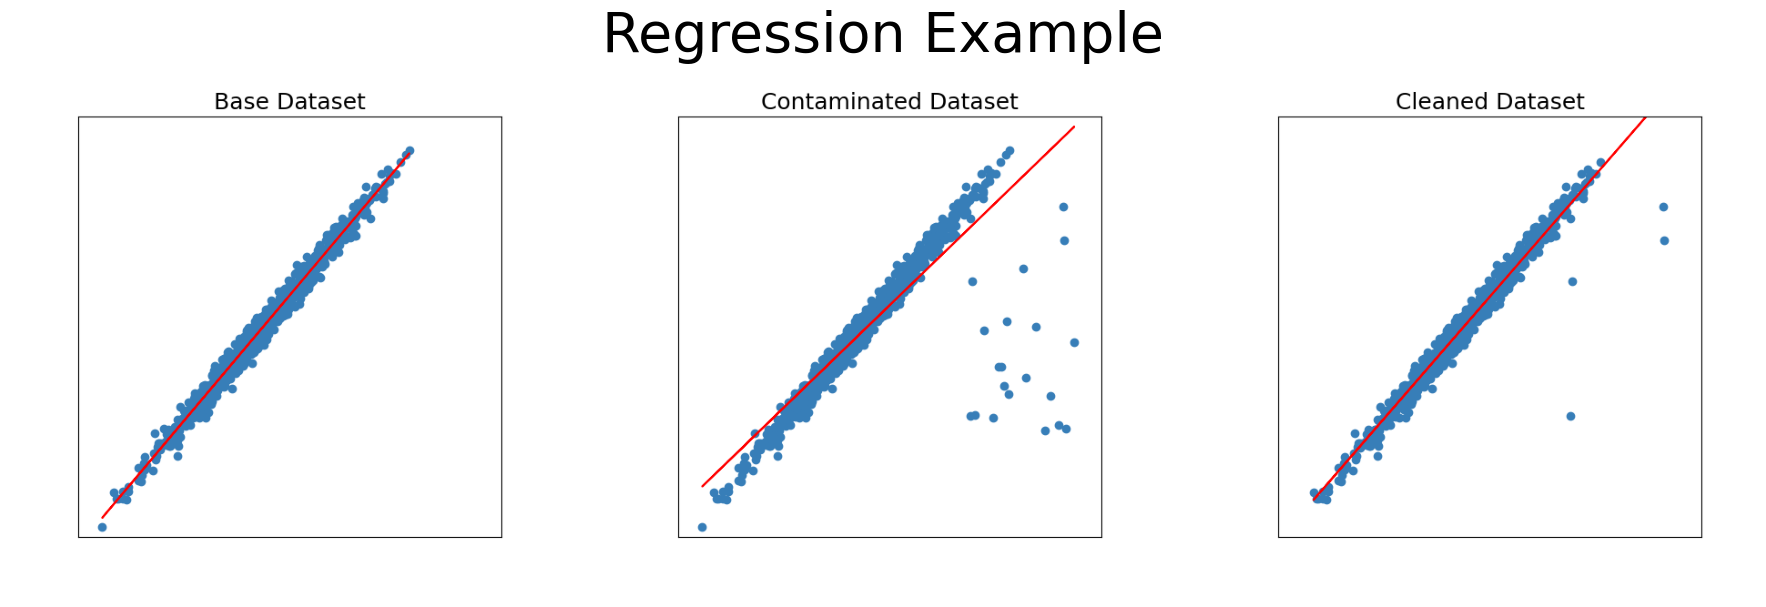

In [347]:
from io import BytesIO
import matplotlib.pyplot as plt

# Convert the figures to image buffers
buffer_p1 = BytesIO()
buffer_p2 = BytesIO()
buffer_p3 = BytesIO()

p1.savefig(buffer_p1, format='png')
p2.savefig(buffer_p2, format='png')
p3.savefig(buffer_p3, format='png')

buffer_p1.seek(0)
buffer_p2.seek(0)
buffer_p3.seek(0)

# Read the image data from the buffers
img_p1 = plt.imread(buffer_p1)
img_p2 = plt.imread(buffer_p2)
img_p3 = plt.imread(buffer_p3)

# Create a combined plot with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [3, 3, 3]})  # Adjust width ratios as needed

# Plot each image in a separate subplot
axes[0].imshow(img_p1)
axes[0].axis('off')

axes[1].imshow(img_p2)
axes[1].axis('off')

axes[2].imshow(img_p3)
axes[2].axis('off')

# Set a common title for all subplots
fig.suptitle('Regression Example', fontsize=40)


# Adjust layout
fig.tight_layout(pad=0)

# Show the combined plot
plt.show()

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [66.61772415] [81.98434224]


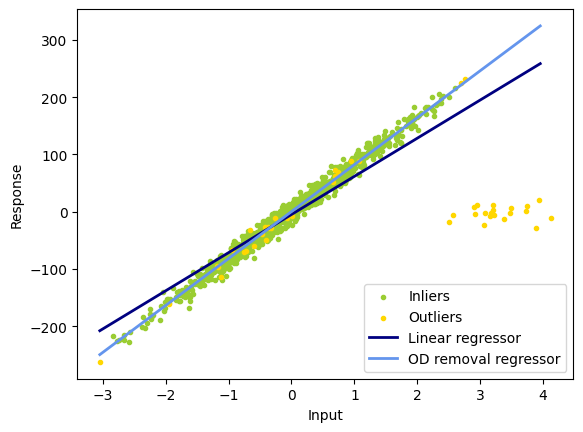

In [345]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model

n_samples = 1000
n_outliers = 20


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)


# Combine X and y into a single dataset
data = np.column_stack((X, y))

# Use LOF to detect outliers
lof = LocalOutlierFactor(n_neighbors=5)
outlier_mask = lof.fit_predict(data) == 1

# Separate X and y without outliers
X_no_outliers = data[outlier_mask, 0]
y_no_outliers = data[outlier_mask, 1]

# Fit line using data without outliers
lr_no_outliers = linear_model.LinearRegression()
lr_no_outliers.fit(X_no_outliers.reshape(-1, 1), y_no_outliers)


# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_no_outl = lr_no_outliers.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, lr_no_outliers.coef_)

lw = 2
# Plot the data without outliers
plt.scatter(X_no_outliers, y_no_outliers, color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[~outlier_mask], y[~outlier_mask], color='gold', marker='.', label='Outliers')
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_no_outl,
    color="cornflowerblue",
    linewidth=lw,
    label="OD removal regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()